In [27]:
import pystac_client
import rasterio

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

POINT_LAT, POINT_LON = 44.95, -63.9125
YEAR = "2023"
SENTINEL_STAC_URL = "https://earth-search.aws.element84.com/v1"
SENTINEL_COLLECTION_NAME = "sentinel-2-l2a"

First, let's search the STAC catalog for our specific point and see what comes up!

In [9]:
stac_client = pystac_client.Client.open(SENTINEL_STAC_URL)

# Search documentation:
# https://pystac-client.readthedocs.io/en/latest/api.html#pystac_client.Client.search
items = stac_client.search(
    intersects=dict(type="Point", coordinates=(POINT_LON, POINT_LAT)),
    collections=[SENTINEL_COLLECTION_NAME],
    datetime=YEAR,  # Will search all of 2023
    query={"eo:cloud_cover":{"lt":10}}
).item_collection()

# Now lets print out how many images we have!
len(items)

6

Now lets grab one of our Sentinel-2 images and look at the metadata! It will tell us a TON about the image!

In [16]:
items[0]

<Item id=S2A_20TMQ_20230622_0_L2A>

In [15]:
items[0].assets["thumbnail"].href

'https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/20/T/MQ/2023/6/S2A_20TMQ_20230622_0_L2A/thumbnail.jpg'

Let's take a peek at the thumbnail inside the metadata!

![image](https://sentinel-cogs.s3.us-west-2.amazonaws.com/sentinel-s2-l2a-cogs/20/T/MQ/2023/6/S2A_20TMQ_20230622_0_L2A/thumbnail.jpg)

Now that we have an image and know what it should look like, how about we actually load the full image?

We could load the Red, Green, and Blue bands individually and manually stitch them together, but the **visual** asset has that done for us already!

(3, 10980, 10980)


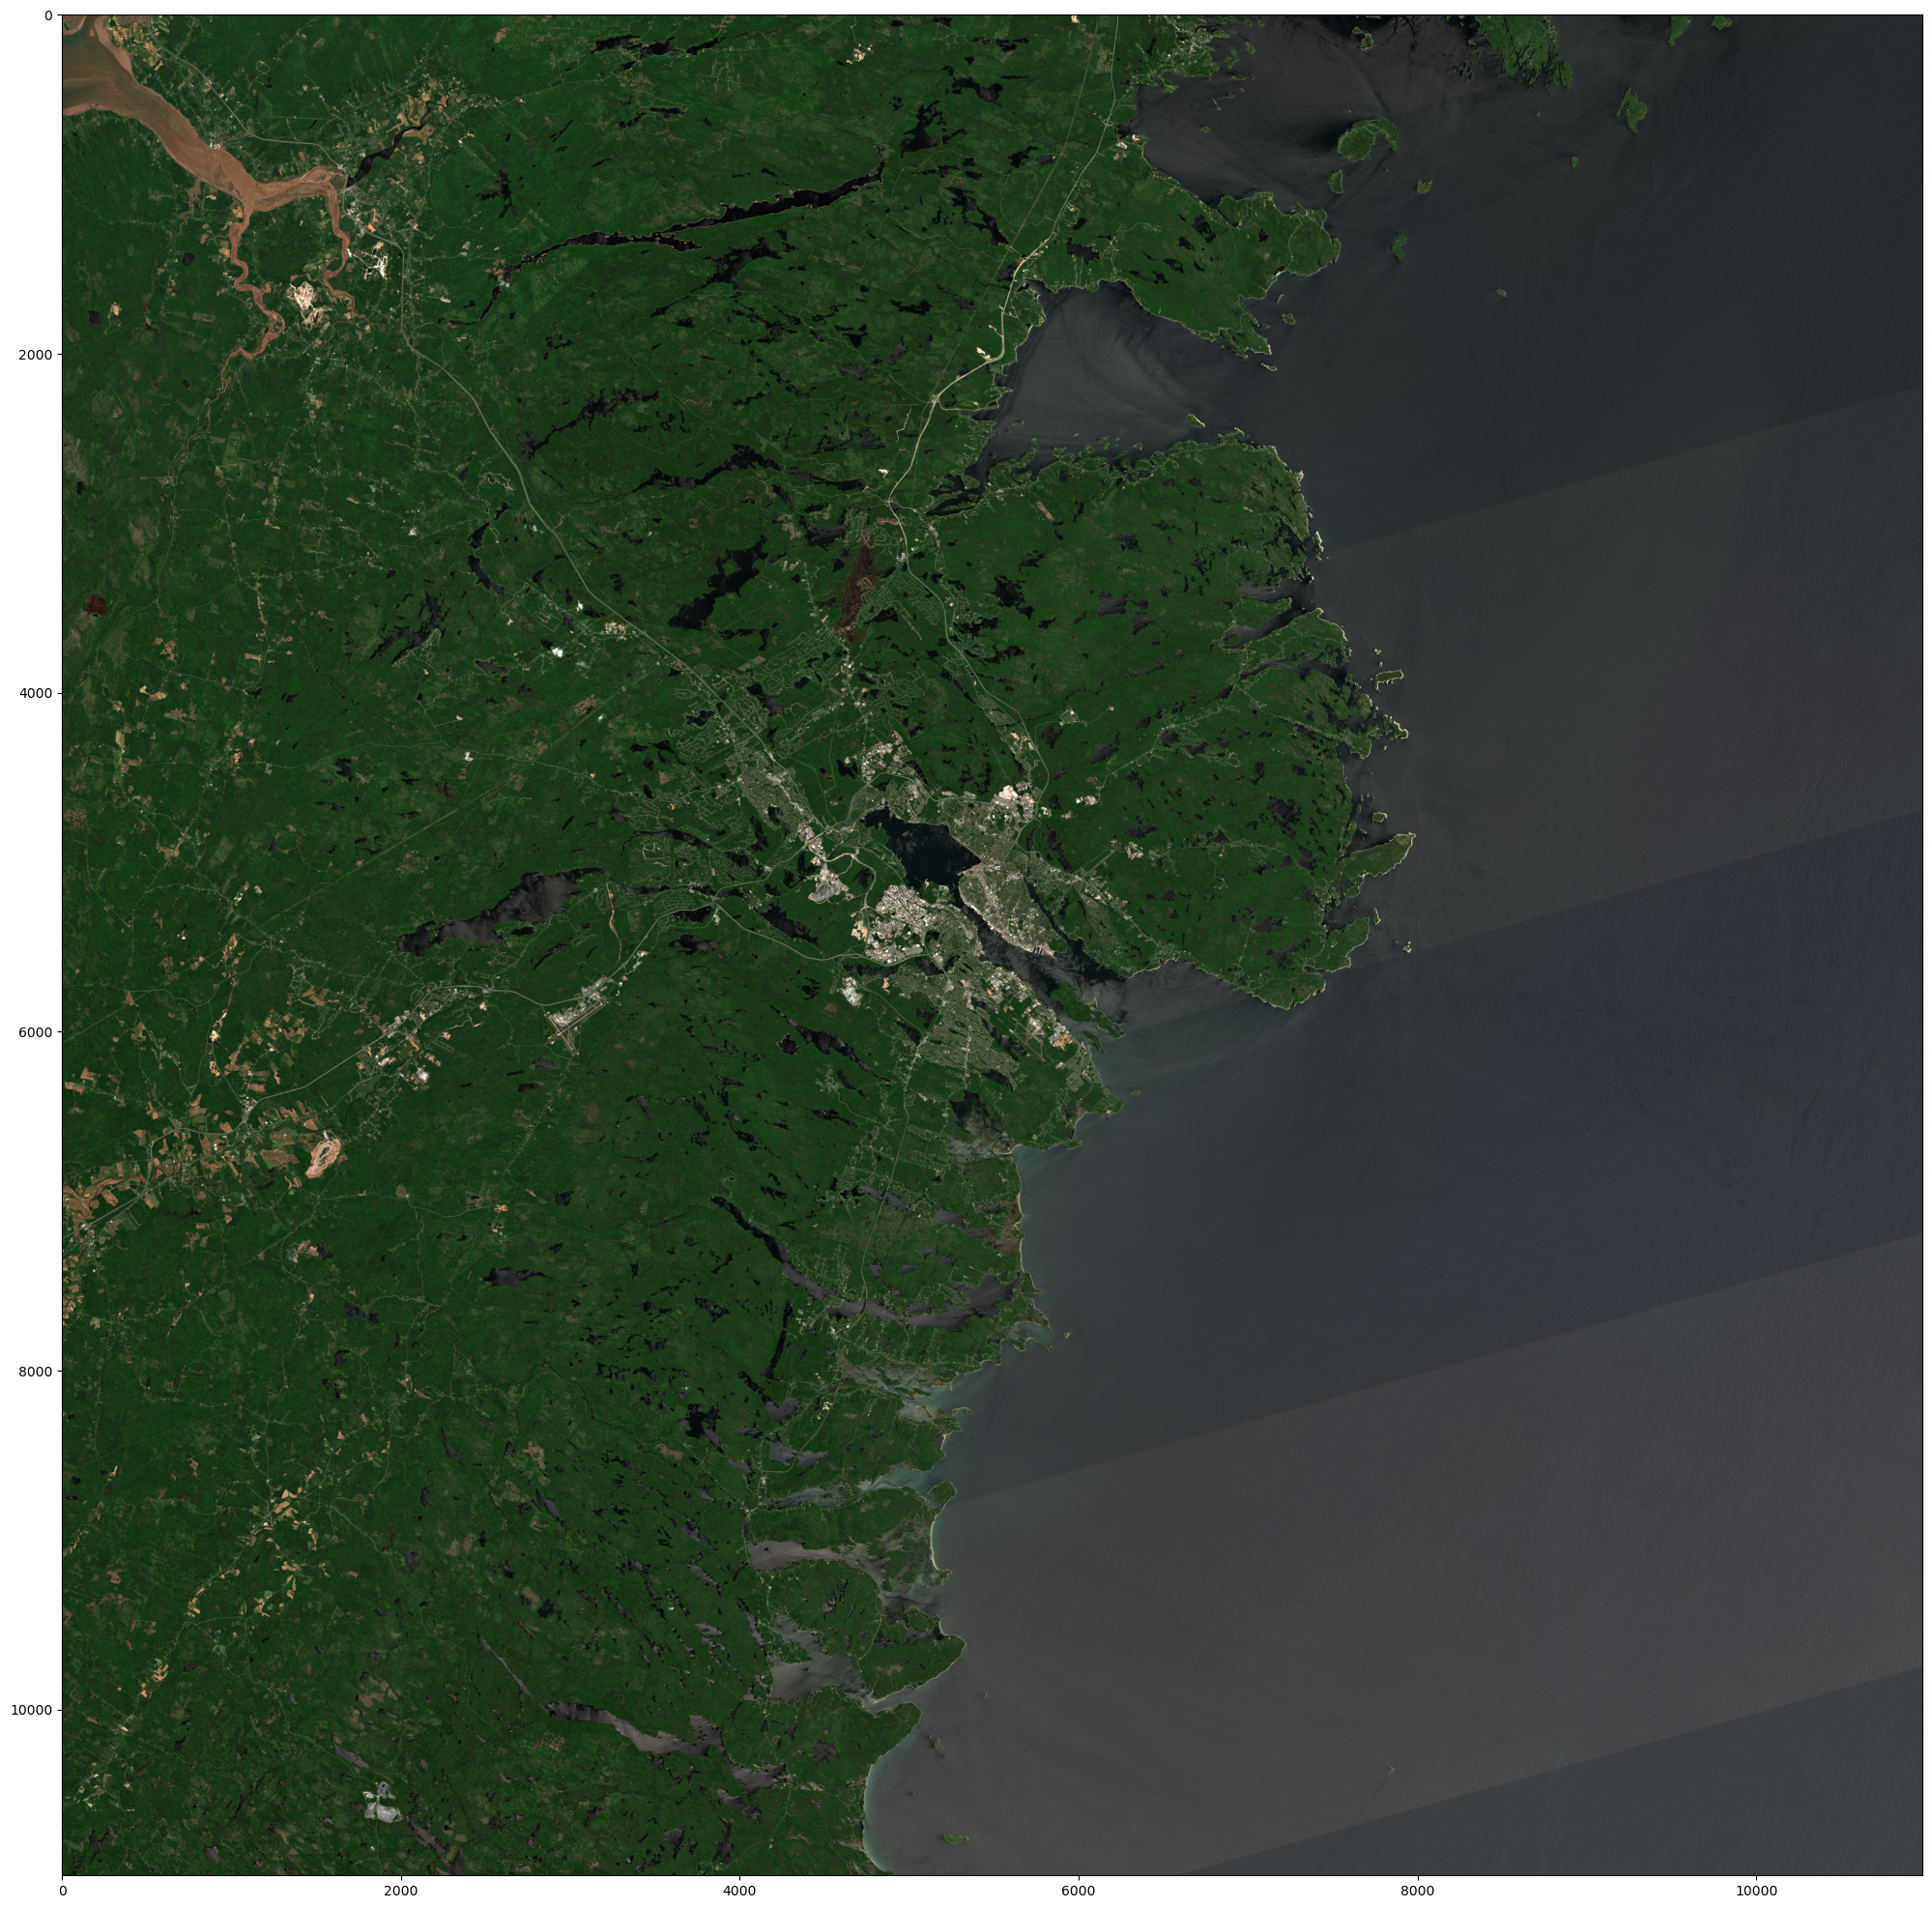

In [26]:
visual_url = items[0].assets["visual"].href
visual_array = rasterio.open(visual_url).read()

print(visual_array.shape)
plt.figure(figsize=(25, 25))  # BIG figure to show how pretty the image is!
plt.imshow(np.swapaxes(visual_array, 0, -1))
plt.show()

And finally, let's save this as an image so we can bask in it's glory!

In [31]:
# Uses PIL, might take a second!
Image.fromarray(np.swapaxes(visual_array, 0, -1)).save("sentinel2_visible.jpeg")

🥳 Congratulations on your first foray into geospatial analysis! The world..nay the UNIVERSE 🛰️🌌🚀 is your oyster!

Get out there and make some amazing things, that's an order!